# Businesscase:-to predict whether a patient will have diabetes or not??

### Binary classification

In [5]:
#Let's start with importing necessary libraries

import pandas as pd# reading the file other necessary operation  
import numpy as np# from that we can get mean median and other operation
from sklearn.preprocessing import StandardScaler # for scaling the data 
from sklearn.linear_model  import LogisticRegression # importing logoistic regression
from sklearn.model_selection import train_test_split # for splitting the data in to trainning and testing 

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score #metric to check model performance
import matplotlib.pyplot as plt # visualization library , analysis of data 
import seaborn as sns # visualization library , analysis of data
import warnings
warnings.filterwarnings('ignore') # to ignore warnings

In [4]:
data = pd.read_csv("diabetes1.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.Outcome.value_counts()

# Basic Checks

In [ ]:
data.head()#it will give you first  5 rows

In [ ]:
data.tail()#it will give you last 5 rows

In [ ]:
data.info()# To check  data type and  null value of all columns

In [ ]:
data.describe()#used to view some basic statistical details like percentile, mean, std etc.

In [ ]:
data['Pregnancies'].dtype # Checking the data type of particular column

In [ ]:
data['BloodPressure'].dtype== 'int64' # checking whether a particular column has int32 datatype or not

In [ ]:
## Task:-Do the all feature analysis with the help of google.(Healthline)

# Exploratory Data Analysis

### Univariate Analysis

In [ ]:
!pip install sweetviz

In [ ]:
# In-depth EDA (target analysis, comparison, feature analysis, correlation) 

# importing the library
import sweetviz as sv #  library for univariant analysis

# analyzing the dataset
my_report = sv.analyze(data)## pass the original dataframe

#display the report
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

In [ ]:
# let's see how data is distributed for every column

# figsize defines canvas size, gives figure dimension (width, height) in inches
plt.figure(figsize=(20,25), facecolor='white')  # plt.figure()


plotnumber = 1    # maintian count for graph

for column in data:
    if plotnumber<=9 :                      # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)    # plotting 9 graphs (3-rows,3-columns) ,plotnumber is for count 
        sns.distplot(data[column])          #plotting dist plot to know distribution
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1   # plotnumber = plotnumber + 1
plt.show()

In [ ]:
plt.figure(figsize=(20,25), facecolor='white')# defining  canvas size
plotnumber = 1 # initializing plotnumber variable to 1 it will maintain the count of how many graph is going to plot in canvas 

for column in data.columns:               # iteration of columns / acessing the columns from  dataset 
    if plotnumber<=9 :                    # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)  # plotting 9 graphs (3-rows,3-columns) ,plotnumber is for count  
        sns.histplot(x=data[column],hue=data.Outcome) ## it give frequency hue =value counts
        plt.xlabel(column,fontsize=20)    #assigning name to x-axis and "name" font size is 20
        plt.ylabel('Outcome',fontsize=20) #assigning name to y-axis and "name" font size is 20
    plotnumber+=1                         # increment of plotnumber 
plt.show()                                # to show graph

# Data preprocessing

In [ ]:
## get the missing values
data.isnull().sum()

#### It seems that there are no missing values in our data. Great, let's see the distribution of data:

We can see there is some skewness in the data, let's deal with data.

Also, we can see there few data for columns Glucose, Insulin, skin thickness, BMI and Blood Pressure which have value as 0. That's not possible. You can do a quick search to see that one cannot have 0 values for these. Let's deal with that. we can either remove such data or simply replace it with their respective mean values. Let's do the latter.

In [ ]:
data.loc[data['BMI']==0]  # how many 0 entry in the bmi column 

In [ ]:
data['BMI'].mean()  #bmi column mean

In [ ]:
# replacing zero values with the mean of the column
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())#replacing 0 with mean of the bmi 
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())#replacing 0 with mean of the Bloodpressure 
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())##replacing 0 with mean of the Glucose
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())#replacing 0 with mean of the Insulin
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())#replacing 0 with mean of the Skinthickness

In [ ]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

The data looks much better now than before. We will start our analysis with this data now as we don't want to lose important information.
If our model doesn't work with accuracy, we will come back for more preprocessing.


# Feature Selection

<AxesSubplot:>

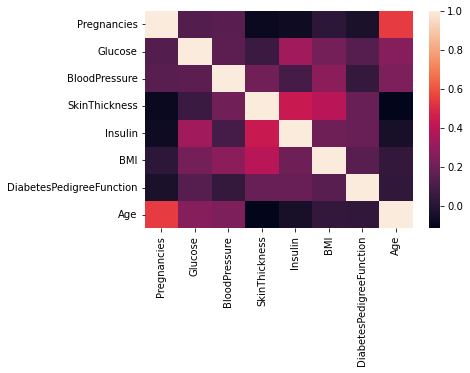

In [6]:
sns.heatmap(data.drop('Outcome',axis=1).corr())# checking for correlation
## No correlated features are present

In [7]:
## checking the duplicate rows
data.duplicated().sum()

0

In [8]:
## checking the constant features
data.describe()
## the standard deviation is not zero for any feature,so there are no constant features in the dataset.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Model Creation

In [9]:
## Defining X and y and creating dependent and independent variables
X = data.drop(columns = ['Outcome']) ## independent variable
y = data['Outcome'] ## Dependent or target variable


In [11]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [12]:
## scaling the data as all features seems to be near to normal distribution
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()           ## object creation
X_scaled = scalar.fit_transform(X)  # scaling independent variables

In [13]:
X_scaled #scaled data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [14]:
## splitting training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25,random_state = 355)#splitting data into train and test

In [15]:
##Model creation
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()      #object creation of logistic regression
    
log_reg.fit(x_train,y_train)        #training model with training data

LogisticRegression()

In [16]:
y_train_pre=log_reg.predict(x_train)     # predicting y_train

- Let's see how well our model performs on the test data set.

In [17]:
y_pred = log_reg.predict(x_test) # predicting y_test

In [18]:
y_train.shape # to know the shape of y_train (rows and columns)

(576,)

In [19]:
y_pred.shape # to know the shape of y_pred (rows and columns )

(192,)

In [20]:
# Evaluating the model

from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report

In [21]:
## calculating accuracy for training set
accuracy = accuracy_score(y_train,y_train_pre)# model traning accuracy  ... true positive, true negative
accuracy

0.7829861111111112

In [22]:
accuracy = accuracy_score(y_test,y_pred)# model traning accuracy  
accuracy

0.765625

- Precision: What proportion of positive identifications was actually correct?

In [23]:
# Precison
Precision = precision_score(y_test,y_pred)# the number of true positive divided by the total number of positive prediction
Precision

0.7115384615384616

Our model has a precision of 0.7—in other words, out of total predicted positives, 70% are actually positives.

- Recall: What proportion of actual positives was identified correctly?

In [24]:
# Recall (recall varies from 0.0 to 1.0)
Recall = recall_score(y_test,y_pred)# the total number of positive results how many positives were correctly predicted by the model.
Recall

0.5522388059701493

Our model has a recall of 0.52—in other words, out of total actual positive values, model has predicted positives is only 52%

In [25]:
# F1 Score
F1_Score = f1_score(y_test,y_pred)# when precision and recall both are important
F1_Score

0.6218487394957983

In [26]:
##confusion matrix
pd.crosstab(y_test, y_pred)

col_0,0,1
Outcome,,
0,110,15
1,30,37


In [27]:
confusion_matrix(y_test, y_pred)

array([[110,  15],
       [ 30,  37]], dtype=int64)

In [28]:
report=classification_report(y_test, y_pred)# it will give precision,recall,f1 scores and accuracy  
print(report)

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       125
           1       0.71      0.55      0.62        67

    accuracy                           0.77       192
   macro avg       0.75      0.72      0.73       192
weighted avg       0.76      0.77      0.76       192



In [29]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.7161194029850746

# ROC PLOT

In [30]:
log_reg.predict_proba(x_test)

array([[0.82969341, 0.17030659],
       [0.73415094, 0.26584906],
       [0.67327332, 0.32672668],
       [0.69428165, 0.30571835],
       [0.88878898, 0.11121102],
       [0.67020787, 0.32979213],
       [0.82096275, 0.17903725],
       [0.80408358, 0.19591642],
       [0.59470408, 0.40529592],
       [0.52778763, 0.47221237],
       [0.87865161, 0.12134839],
       [0.94885818, 0.05114182],
       [0.6676367 , 0.3323633 ],
       [0.10393732, 0.89606268],
       [0.05648121, 0.94351879],
       [0.75815186, 0.24184814],
       [0.56271989, 0.43728011],
       [0.91458195, 0.08541805],
       [0.70855688, 0.29144312],
       [0.98479603, 0.01520397],
       [0.93602461, 0.06397539],
       [0.32082462, 0.67917538],
       [0.67196683, 0.32803317],
       [0.96881791, 0.03118209],
       [0.58542947, 0.41457053],
       [0.6251836 , 0.3748164 ],
       [0.66485018, 0.33514982],
       [0.90517328, 0.09482672],
       [0.9002583 , 0.0997417 ],
       [0.8965565 , 0.1034435 ],
       [0.

In [31]:
## Prediciting the probabilities of class 1
probs=log_reg.predict_proba(x_test)[:, 1] # for all the records and column index 1 (ie., class 1)

In [32]:
probs#probabilities of class 1

array([0.17030659, 0.26584906, 0.32672668, 0.30571835, 0.11121102,
       0.32979213, 0.17903725, 0.19591642, 0.40529592, 0.47221237,
       0.12134839, 0.05114182, 0.3323633 , 0.89606268, 0.94351879,
       0.24184814, 0.43728011, 0.08541805, 0.29144312, 0.01520397,
       0.06397539, 0.67917538, 0.32803317, 0.03118209, 0.41457053,
       0.3748164 , 0.33514982, 0.09482672, 0.0997417 , 0.1034435 ,
       0.49084606, 0.63667322, 0.76730738, 0.25025928, 0.17907855,
       0.03912214, 0.30513878, 0.0753325 , 0.10454975, 0.04522678,
       0.17016381, 0.06761524, 0.25138736, 0.72594161, 0.27003195,
       0.09108794, 0.08763225, 0.0108846 , 0.22491295, 0.44800837,
       0.1832434 , 0.82309745, 0.29818447, 0.2137027 , 0.09159812,
       0.03545089, 0.42802311, 0.04343733, 0.88254843, 0.13287757,
       0.06339641, 0.20166576, 0.62593543, 0.62488364, 0.64263888,
       0.68661196, 0.7789112 , 0.08601424, 0.04156164, 0.24790551,
       0.14608101, 0.15223363, 0.84342288, 0.93121052, 0.43357

In [44]:
## Defining the threshold limit
def predict_threshold (model,X_test,thresholds):
    return np.where(model.predict_proba(X_test)[:,1]>thr, 1, 0)

## if the given condition is true, return '1' else return '0'

In [45]:
#model - log_reg, X_test -> x_test, threshold -> thr
np.where(log_reg.predict_proba(x_test)[:,1]>thr, 1, 0) 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [39]:
import numpy as np
from sklearn.metrics import confusion_matrix

for thr in np.arange(0,1.0,0.1):# it will create array from range 0 to 1 with step 0.1
    y_predict = predict_threshold(log_reg,x_test,thr)# it will check result  for  each threshold from 0 to 1
    print("Threshold :",thr)#printing threshold
    print(confusion_matrix(y_test,y_predict))# confusion matrix for each prediction

Threshold : 0.0
[[  0 125]
 [  0  67]]
Threshold : 0.1
[[45 80]
 [ 1 66]]
Threshold : 0.2
[[75 50]
 [ 9 58]]
Threshold : 0.30000000000000004
[[94 31]
 [16 51]]
Threshold : 0.4
[[101  24]
 [ 26  41]]
Threshold : 0.5
[[110  15]
 [ 30  37]]
Threshold : 0.6000000000000001
[[115  10]
 [ 33  34]]
Threshold : 0.7000000000000001
[[120   5]
 [ 40  27]]
Threshold : 0.8
[[122   3]
 [ 49  18]]
Threshold : 0.9
[[124   1]
 [ 61   6]]


In [40]:
## visualizing the roc plot
def plot_roc_curve(fpr, tpr):# function to plot roc curve
    plt.plot(fpr, tpr, color='orange', label='ROC')#line plot between fpr and tpr
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')# assigning name to  x axis
    plt.ylabel('True Positive Rate')# assigning name to y axis
    plt.title('Receiver Operating Characteristic (ROC) Curve')#assigning name to curve  
    plt.legend()#area describing the elements of the graph
    plt.show()#to show graph without location

In [41]:
from sklearn.metrics import roc_auc_score,roc_curve ## used to compare multiple models

auc = roc_auc_score(y_test, probs) #roc curve 
print('AUC: %.2f' % auc)

AUC: 0.84


In [42]:
fpr, tpr, thresholds = roc_curve(y_test, probs)
# it will return 
#Increasing false positive rates such that element i is the false positive rate of predictions with score >= thresholds[i].
#Increasing true positive rates such that element i is the true positive rate of predictions with score >= thresholds[i].
#Decreasing thresholds on the decision function used to compute fpr and tpr

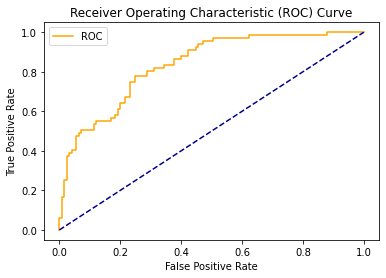

In [43]:
import matplotlib.pyplot as plt
plot_roc_curve(fpr, tpr)#plotting ruc curve

### What is the significance of Roc curve and AUC?
In real life, we create various models using different algorithms that we can use for classification purpose. We use AUC to determine which model is the best one to use for a given dataset. Suppose we have created Logistic regression, SVM as well as a clustering model for classification purpose. We will calculate AUC for all the models seperately. The model with highest AUC value will be the best model to use.

### Advantages of Logisitic Regression
- It is very simple and easy to implement.
- The output is more informative than other classification algorithms
- It expresses the relationship between independent and dependent variables
- Very effective with linearly seperable data
### Disadvantages of Logisitic Regression
- Not effective with data which are not linearly seperable
- Not as powerful as other classification models
- Multiclass classifications are much easier to do with other algorithms than logisitic regression
- It can only predict categorical outcomes

# Multiclass classification

In [59]:
data=pd.read_csv('iris.csv')# loading another dataset for multiclass classification

In [60]:
data.head()# first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [61]:
X=data.loc[:,['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]#independent variable 
y=data.Species#dependent variable

In [62]:
y#dependent variable

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)# training and testing  data

In [64]:
LR=LogisticRegression(multi_class='ovr')# logistic regression for multiclass classification ovr-> one vs rest

In [65]:
LR.fit(X_train,y_train)#  training model

LogisticRegression(multi_class='ovr')

In [66]:
y_hat=LR.predict(X_test)# predicting the results

In [67]:
pd.crosstab(y_test,y_hat) # confusion matrix 

col_0,Iris-setosa,Iris-versicolor,Iris-virginica
Species,,,
Iris-setosa,15,0,0
Iris-versicolor,0,10,1
Iris-virginica,0,0,12


In [68]:
# Evaluating the model

from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report
#checking recall 
recall=recall_score(y_test,y_hat,average='weighted') # weighted: makes sure that 
recall

0.9736842105263158

In [69]:
precision=precision_score(y_test,y_hat,average='weighted')# checking precision
precision

0.9757085020242916

In [70]:
print(classification_report(y_test,y_hat))#recall,precision,f1 scores and accuracy

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.97        38
      macro avg       0.97      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [71]:
pwd

'C:\\Users\\MUSADDIQ KHAN\\Logistic Regression'